# Perceptron Learning Algorithm (PLA)
## Preparação dos dados 🎲

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [2]:
ponto_1, ponto_2 = np.random.uniform(-1, 1, (2, 2))

coeficiente_angular = (ponto_2[1] - ponto_1[1]) / (ponto_2[0] - ponto_1[0])
coeficiente_linear = ponto_1[1] - coeficiente_angular * ponto_1[0]

def classificar_ponto(x, y, coeficiente_angular, coeficiente_linear):
    return np.sign(y - (coeficiente_angular * x + coeficiente_linear))

X = np.random.uniform(-1, 1, (1000, 2))

y = np.array([classificar_ponto(x[0], x[1], coeficiente_angular, coeficiente_linear) for x in X])

f = [coeficiente_angular, coeficiente_linear]

## Visualizando o dataset 👓

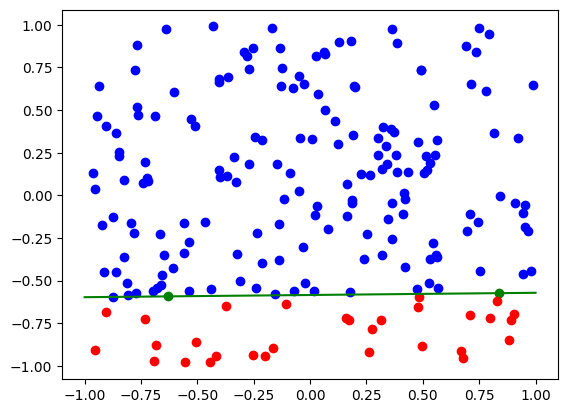

In [3]:
def show_dataset(X, ponto_1, ponto_2, coeficiente_angular, coeficiente_linear):
    line = np.linspace(-1, 1, 1000) 
    plt.plot(line, coeficiente_angular*line + coeficiente_linear, label="f(x)", c="green")

    plt.scatter(ponto_1[0], ponto_1[1], c='green')
    plt.scatter(ponto_2[0], ponto_2[1], c='green')

    for i in range(len(X[:200])):
        if (y[i] == 1):
            plt.scatter(X[i][0], X[i][1], c='blue')
        else:        
            plt.scatter(X[i][0], X[i][1], c='red')

    plt.show()  
    
show_dataset(X, ponto_1, ponto_2, coeficiente_angular, coeficiente_linear)    

## Algoritmo PLA 🤖
### Função para visualização dos passos do PLA

In [4]:
from IPython.display import clear_output
def plot_grafico(X, y, w, f):   
    nPontos = len(X)     
            
    ax = plt.gca()
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')

    plt.axis([-1, 1, -1, 1])

    x_plt = [X[i][0] for i in range(nPontos)]
    y_plt = [X[i][1] for i in range(nPontos)]

    for i in range(nPontos):
        if (y[i] == 1):
            plt.scatter(x_plt[i], y_plt[i], s=10, c='blue')
        else:
            plt.scatter(x_plt[i], y_plt[i], s=10, c='red')

    x = np.linspace(-1, 1, 1000)
    plt.plot(x, f[0]*x + f[1], c='green')
    plt.plot(x, (-w[0] - w[1]*x) / w[2], c='orange') 
    clear_output(wait=True)    
    plt.show(block=False)    
    plt.pause(0.01)  

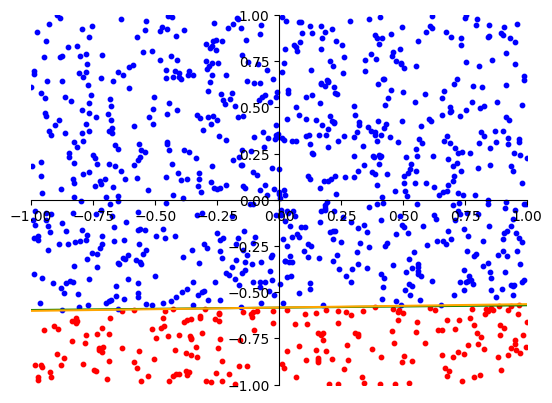

(1232, array([16.        , -0.49651209, 27.42690329]))

In [5]:
def PLA(X, y, f):
    it = 0 
    w = np.zeros(3)
    listaPCI = list(range(len(X)))
    
    while listaPCI:
        idx = np.random.choice(listaPCI)
        xi = np.insert(X[idx], 0, 1) 
        yi = y[idx]
        
        if np.sign(w.dot(xi)) != yi:
            w += yi * xi  
            it += 1 
            (X, y, w, f) 

            listaPCI = [i for i in range(len(X)) if np.sign(w.dot(np.insert(X[i], 0, 1))) != y[i]]
         
    plot_grafico(X, y, w, f)        
    return it, w   

PLA (X, y, f)

### Função para construir lista de pontos classificados incorretamente

In [6]:
def constroiListaPCI(X, y, w):    
    l = []
    new_y = []
    for i in range(len(X)):
        x_i = np.insert(X[i], 0, 1)
        if np.sign(np.dot(w, x_i)) != y[i]:
            l.append(X[i])
            new_y.append(y[i])
    return l, new_y 

constroiListaPCI(X, y, w)

NameError: name 'w' is not defined

### Calculando a acurácia

In [ ]:
X_teste =  np.random.uniform(-1, 1, (10, 2))
y_teste = np.array([classificar_ponto(x[0], x[1], coeficiente_angular, coeficiente_linear) for x in X_teste])

PLA (X_teste, y_teste, f) 

In [ ]:
def calcular_acuracia(X_teste, y_teste, w):
    X_aug = np.hstack((np.ones((X_teste.shape[0], 1)), X_teste)) 
    predicoes = np.sign(X_aug.dot(w))  
    acuracia = np.mean(predicoes == y_teste) * 100  
    return acuracia

acuracia = calcular_acuracia(X_teste, y_teste, w)
print(f"Acurácia: {acuracia}%")